In [1]:
# Import the warnings module
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
# reading data set
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of dataframe 
df.shape

(730, 16)

In [5]:
# Get descriptive information about the dataframe
# This includes the column names, data types, and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Check for any duplicate entries
df.duplicated().sum()

0

In [8]:
# Drop unnecessary columns from the dataframe
# We remove the 'instant', 'dteday', 'casual', 'registered', and 'atemp' columns
# These columns are not needed for our analysis and can be safely dropped
df.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1, inplace=True)

In [9]:
# Checking the shape of dataframe after dropping unneccesary column
df.shape

(730, 11)

In [10]:
# Identify categorical variables in the dataframe
# These variables have a limited number of discrete values and are not continuous
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Identify numeric variables in the dataframe
# These variables are continuous and can take on any value within a range
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [11]:
# convert dtype of categorical variables
df[cat_vars] = df[cat_vars].astype('category')

In [12]:
# Generating descriptive of columns 
df.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [13]:
# Checking specifically for category column
df.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


In [14]:
# Define a function to map column values
def map_column_values(column, mapping):
    """
    Maps the values of a column in a dataframe using a dictionary mapping.
    
    Parameters:
    column (str): The name of the column to map.
    mapping (dict): A dictionary mapping the original values to the new values.
    
    Returns:
    None. The dataframe is modified in place.
    """
    df[column] = df[column].map(mapping)

# Map the 'season' column
map_column_values('season', {1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Map the 'weekday' column
map_column_values('weekday', {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Map the 'mnth' column
map_column_values('mnth', {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

# Map the 'weathersit' column
map_column_values('weathersit', {1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

### Step - 2. Data  Visualisation

#### 2.1 Univariate analaysis

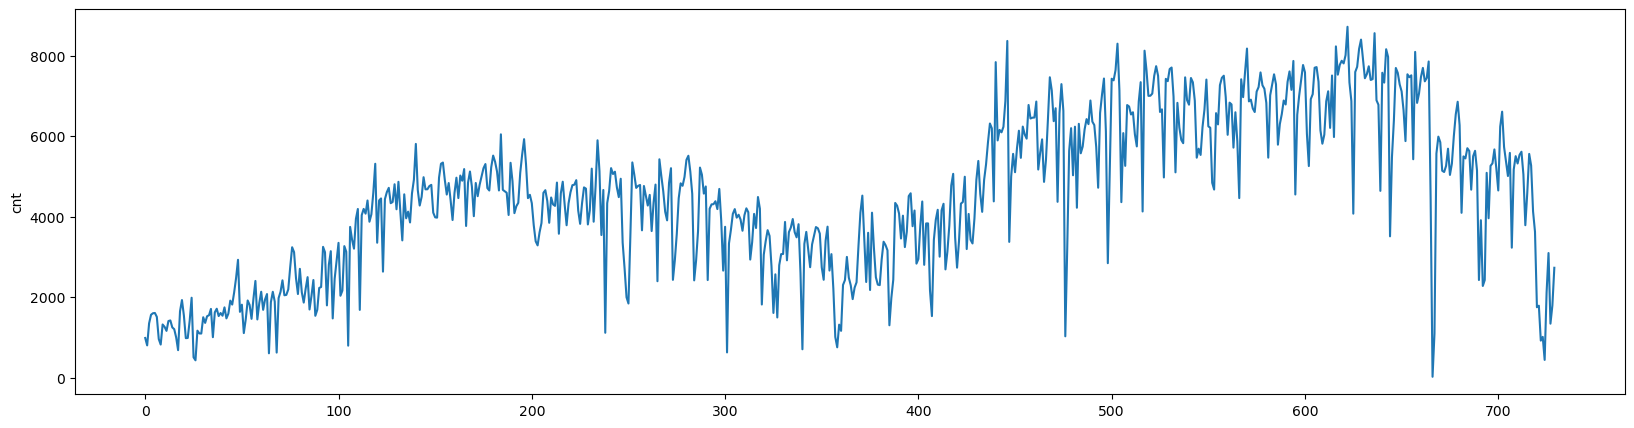

In [15]:
# Visualize the pattern of demand (target variable - 'cnt') over a period of two years
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df.index, y='cnt')
plt.show()

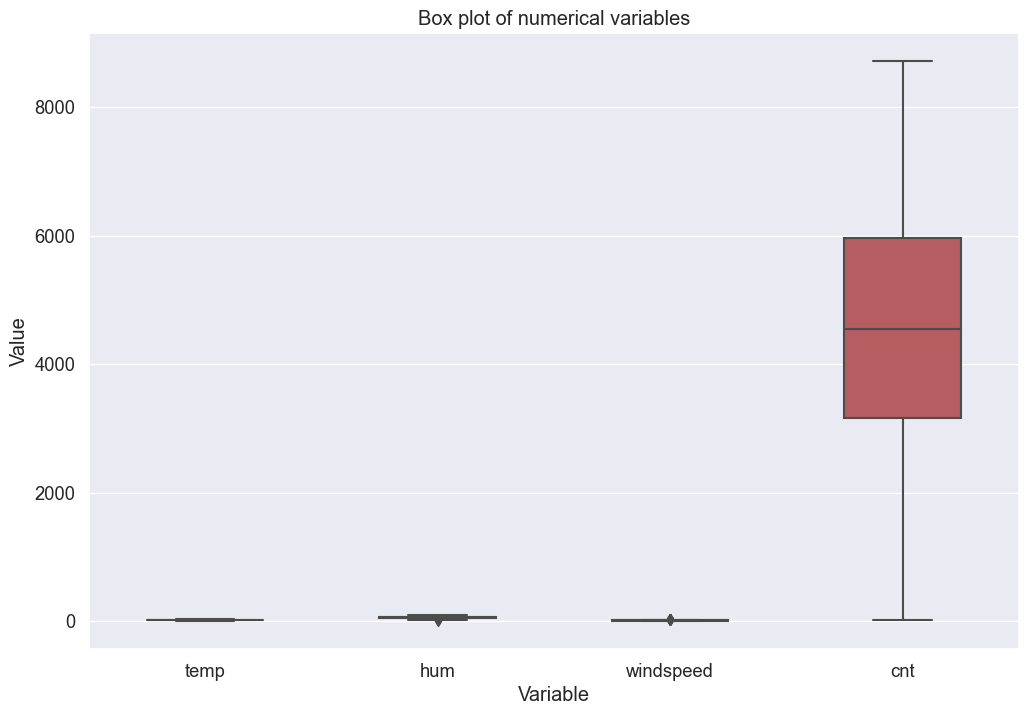

In [16]:
# Select numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Create a box plot for each numerical variable
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.boxplot(data=df[num_vars], orient='v', width=0.5, fliersize=5)
plt.title('Box plot of numerical variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.show()

In [17]:
# Get percentage of outliers for 'hum' and 'windspeed'
def percentage_outlier(column):
    """
    Calculates the percentage of outliers in a column of a dataframe.
    
    Parameters:
    column (str): The name of the column to calculate the percentage of outliers for.
    
    Returns:
    The percentage of outliers in the column, rounded to 2 decimal places.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
    percent_outliers = num_outliers / len(df[column]) * 100
    return round(percent_outliers, 2)

print('Percentage of outliers (hum):', percentage_outlier('hum'))
print('Percentage of outliers (windspeed):', percentage_outlier('windspeed'))

Percentage of outliers (hum): 0.27
Percentage of outliers (windspeed): 1.78


In [18]:
# Check for missing values in 'hum' column
if df['hum'].isnull().values.any():
    print('The "hum" column contains missing values.')
else:
    print('The minimum value of the "hum" column is:', df['hum'].min())

# Check for missing values in 'windspeed' column
if df['windspeed'].isnull().values.any():
    print('The "windspeed" column contains missing values.')
else:
    print('The minimum value of the "windspeed" column is:', df['windspeed'].min())


The minimum value of the "hum" column is: 0.0
The minimum value of the "windspeed" column is: 1.5002439


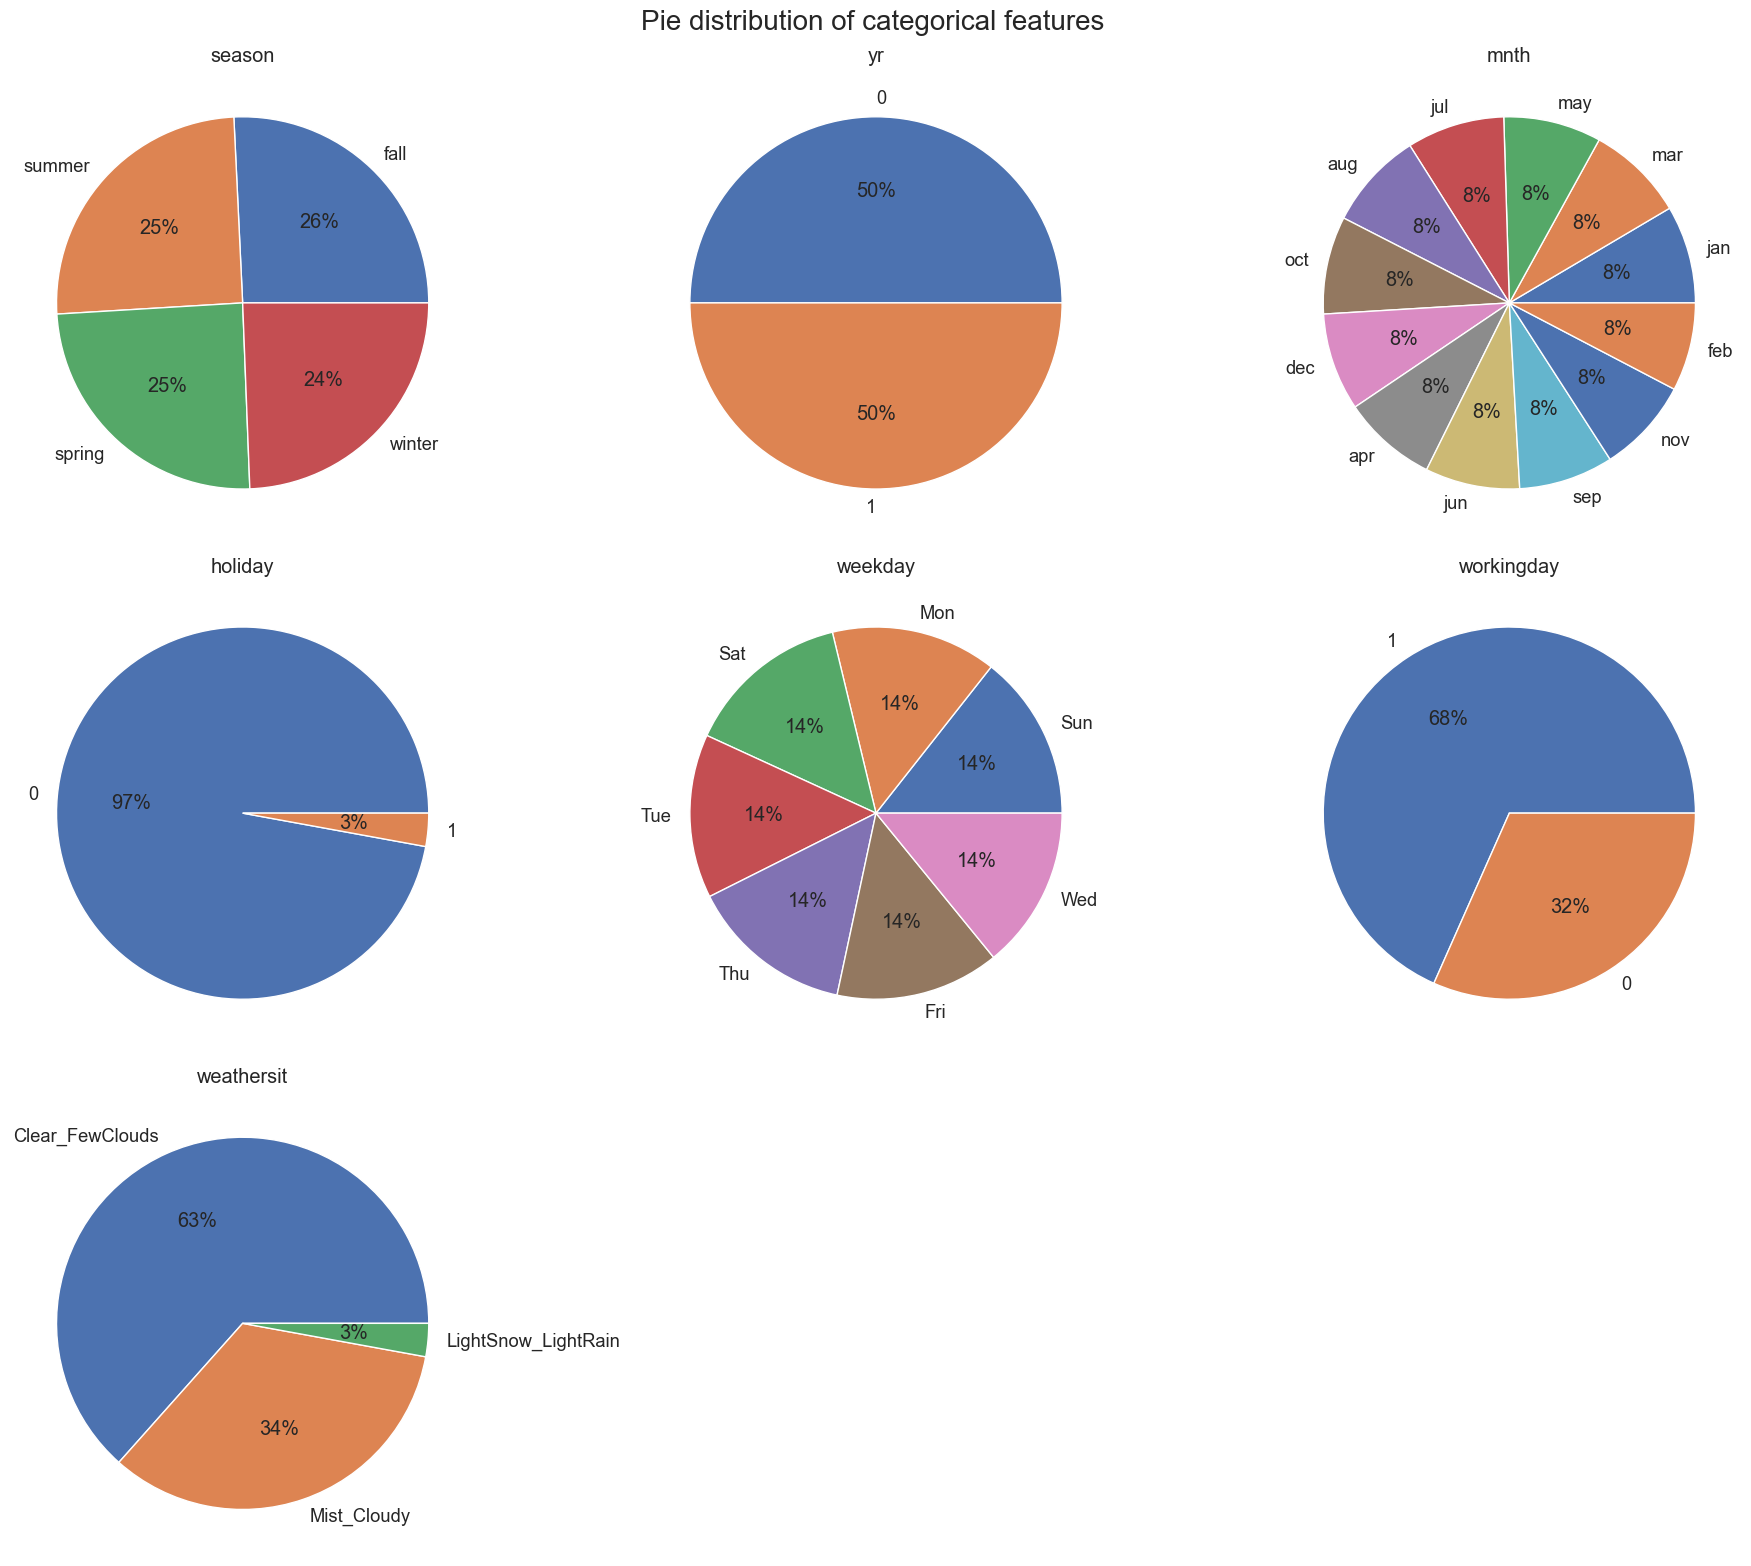

In [19]:
# Select categorical variables
df_piplot = df.select_dtypes(include='category')

# Create pie chart for each categorical variable
plt.figure(figsize=(18,16))
plt.suptitle('Pie distribution of categorical features', fontsize=20)
for i in range(1, df_piplot.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df_piplot.columns.values[i-1])
    values = df_piplot.iloc[:, i-1].value_counts(normalize=True).values
    index = df_piplot.iloc[:, i-1].value_counts(normalize=True).index
    plt.pie(values, labels=index, autopct='%1.0f%%')

# Adjust spacing between subplots and display plot
plt.tight_layout()
plt.show()

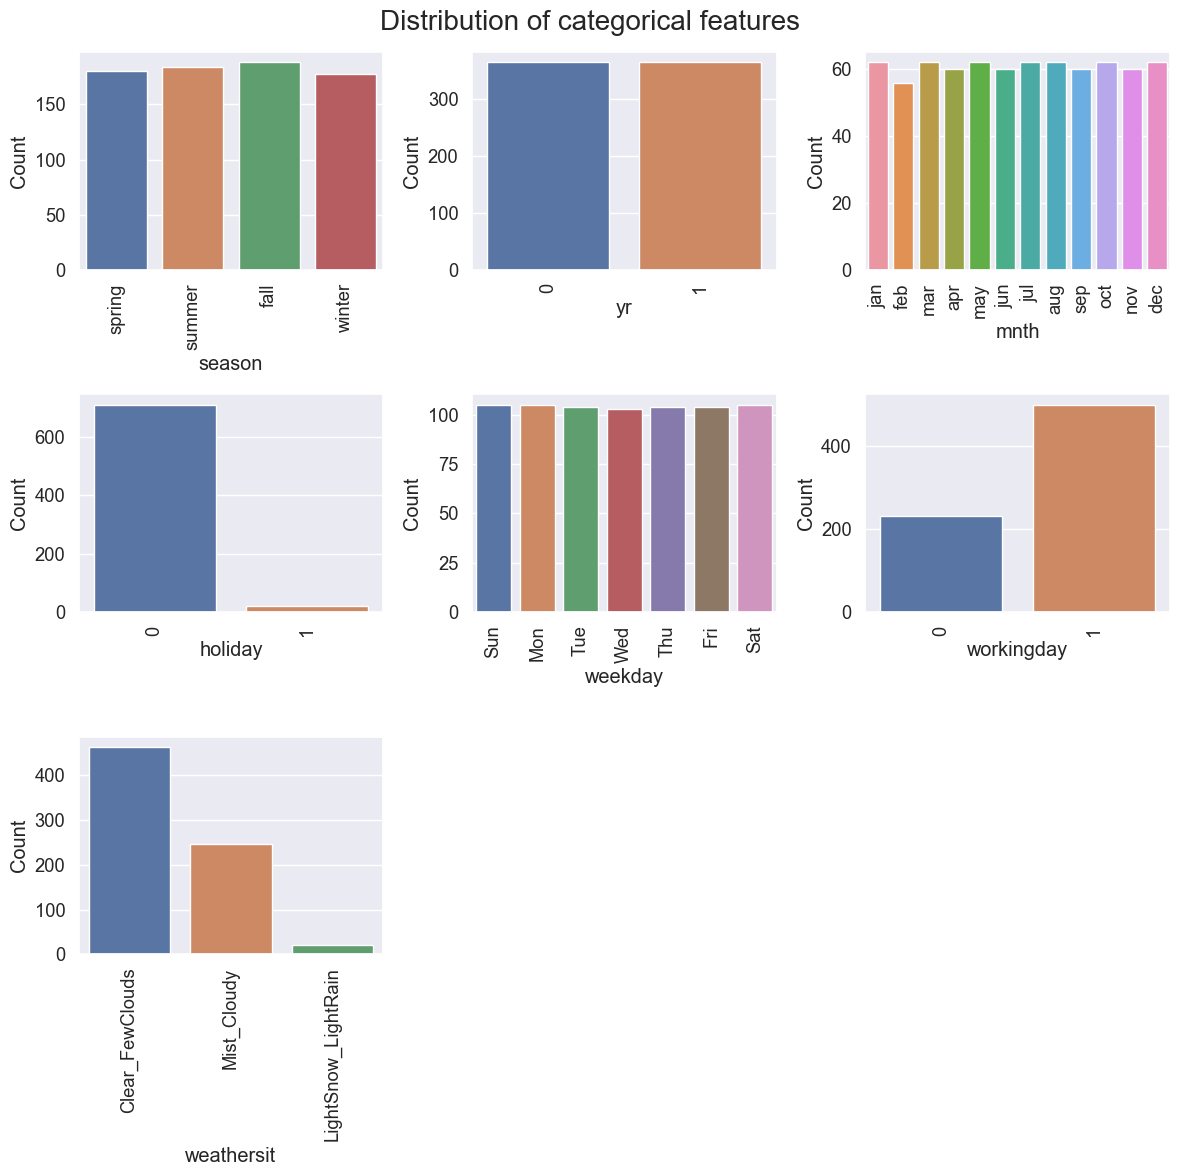

In [20]:
# Select categorical variables
var = df.select_dtypes(include='category').columns

# Define number of columns and rows for subplots
col = 3
row = len(var)//col+1

# Create countplot for each categorical variable
plt.figure(figsize=(12,12))
plt.suptitle('Distribution of categorical features', fontsize=20)
for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sns.countplot(df[i[1]])
    plt.xticks(rotation = 90)
    plt.xlabel(i[1])
    plt.ylabel('Count')

# Adjust spacing between subplots and display plot
plt.tight_layout(pad = 1.0)
plt.show()

#### 2.2 Bi-Variate analysis

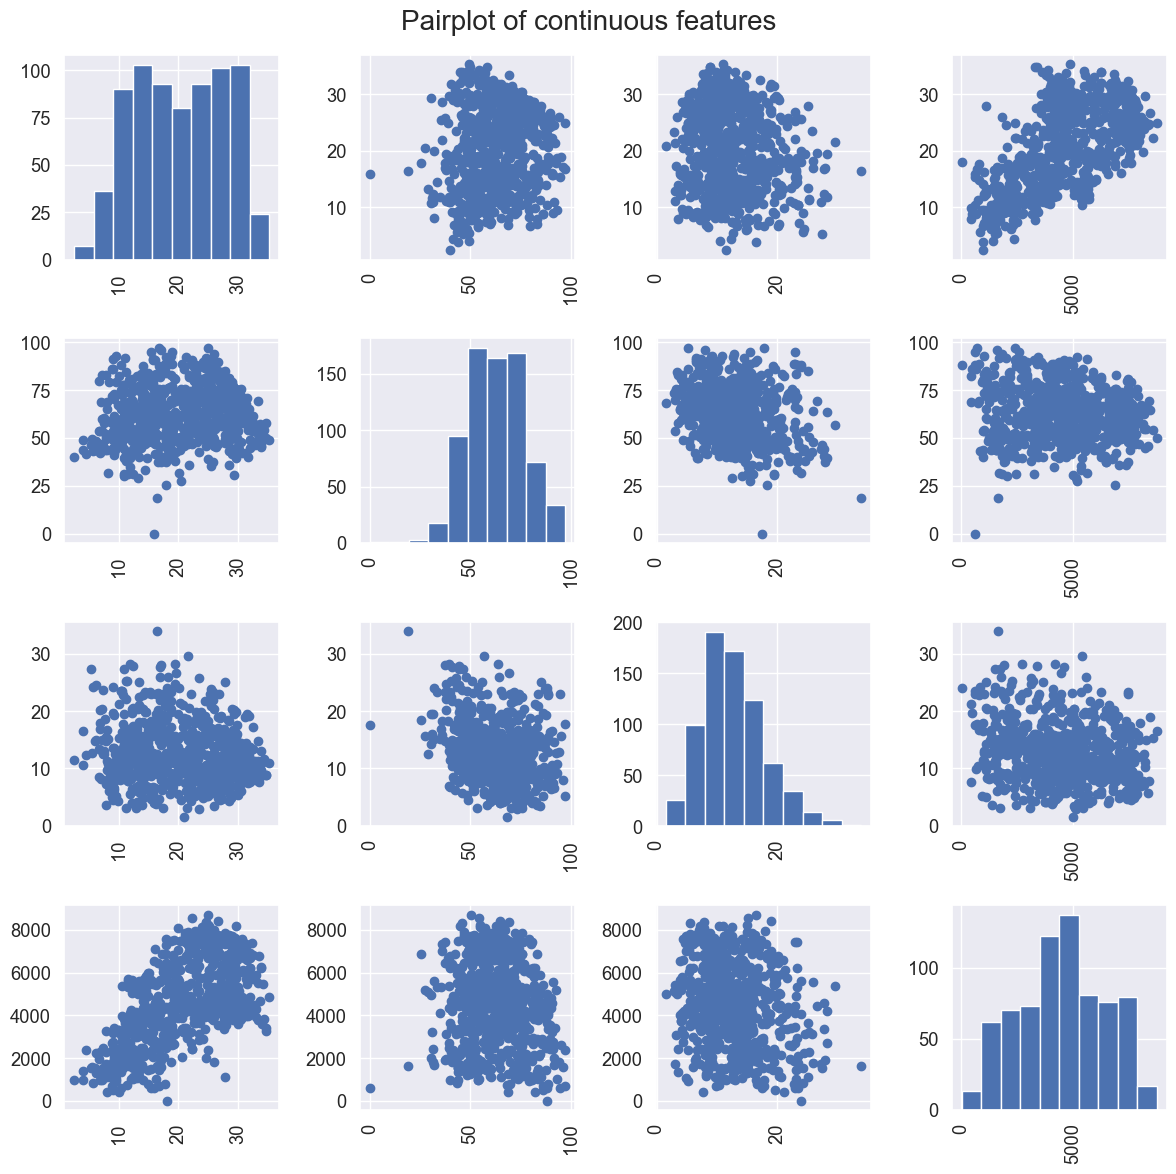

In [21]:
# Create pairplot for continuous data type
num_vars = df.select_dtypes(['int64', 'float64']).columns
plt.figure(figsize=(12,12))
plt.suptitle('Pairplot of continuous features', fontsize=20)
for i, var in enumerate(num_vars):
    for j, var2 in enumerate(num_vars):
        plt.subplot(len(num_vars), len(num_vars), i*len(num_vars)+j+1)
        if i == j:
            plt.hist(df[var].dropna())
        else:
            plt.scatter(df[var2], df[var])
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


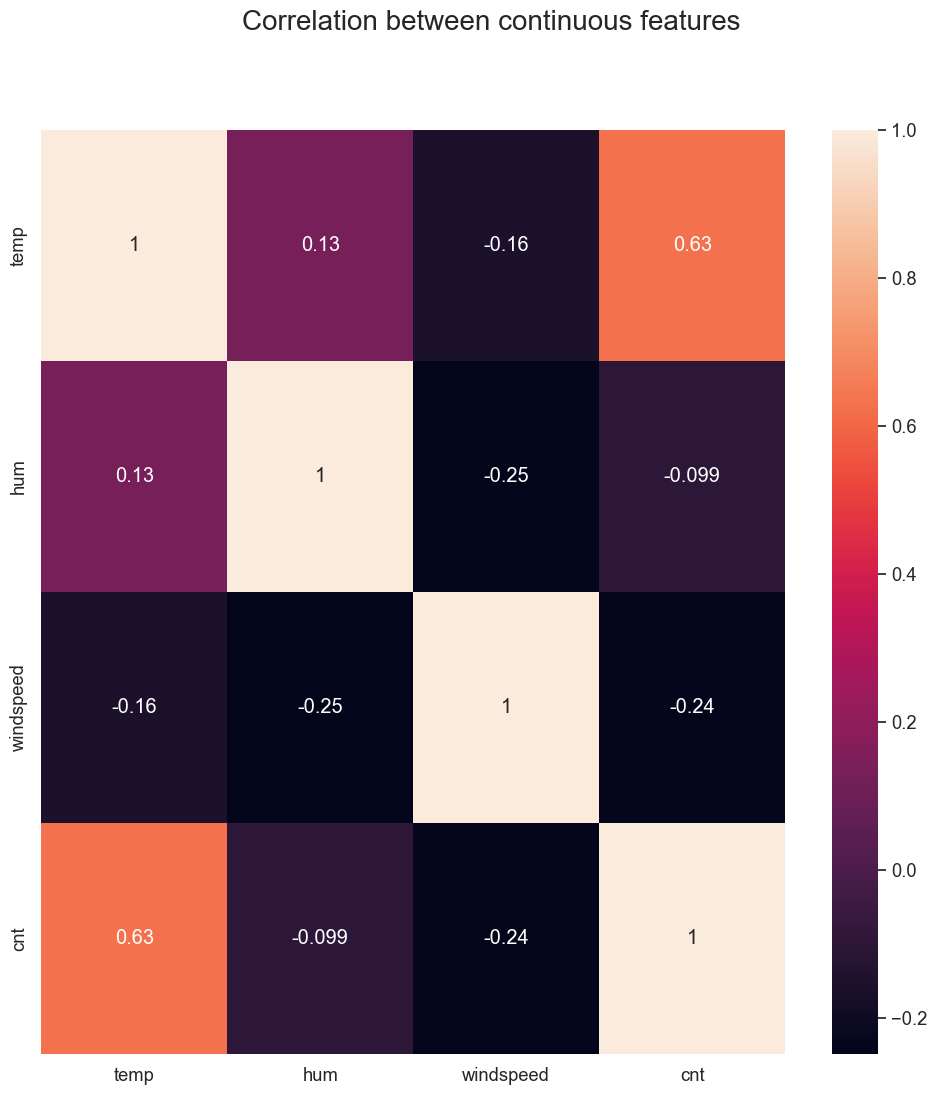

In [22]:
# Create heatmap to visualize correlation between continuous variables
plt.figure(figsize=(12,12))
plt.suptitle('Correlation between continuous features', fontsize=20)
sns.heatmap(df.corr(), annot=True)

# Display plot
plt.show()


In [23]:
# Get dummy variables for categorical variables
dummy_vars = pd.get_dummies(df[['season', 'weekday', 'mnth', 'weathersit']], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_vars], axis=1)

# Drop the original categorical variables from the dataframe
df.drop(['season', 'weekday', 'mnth', 'weathersit'], axis=1, inplace=True)

# Display the first few rows of the updated dataframe
df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# check shape data frame
df.shape

(730, 29)

In [25]:
# Check datafrmae
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   season_summer                   730 non-null    uint8   
 8   season_fall                     730 non-null    uint8   
 9   season_winter                   730 non-null    uint8   
 10  weekday_Mon                     730 non-null    uint8   
 11  weekday_Tue                     730 non-null    uint8   
 12  weekday_Wed           

In [26]:
# Convert categorical columns to numeric
df[['yr', 'holiday', 'workingday']] = df[['yr', 'holiday', 'workingday']].astype('uint8')

# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_summer                   730 non-null    uint8  
 8   season_fall                     730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  weekday_Mon                     730 non-null    uint8  
 11  weekday_Tue                     730 non-null    uint8  
 12  weekday_Wed                     730 

In [27]:
# Split the dataset into training and testing sets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=10)

# Print the shape of the training and testing sets
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


**Training Data scaling**

In [28]:
# Scale the numerical variables in the training set using MinMaxScaler
# Instantiate a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the scaler on the numerical variables in the training set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Display the first few rows of the updated training set
df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,0.194978,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0.737052,1,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0.509236,0,0,1,...,0,0,0,0,0,0,0,1,1,0
264,0,0,1,0.694699,0.910249,0.217975,0.526862,0,1,0,...,0,0,0,0,1,0,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0.863093,0,1,0,...,0,0,0,1,0,0,0,0,0,0


**Testing data scaling**

In [29]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,24.429153,86.5417,14.291100,4459,0,1,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,12.656536,64.6522,12.565984,3598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,29.622500,39.6250,6.874736,5362,0,1,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,26.581653,56.9583,17.000111,7363,1,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,28.358347,47.0000,18.542250,4758,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# Scale the numerical variables in the testing set using the same scaler as the training set
# Transform the scaler on the numerical variables in the testing set
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Display the first few rows of the updated testing set
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0.486297,0,1,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0.382349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0.595316,0,1,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0.836895,1,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0.522395,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### 3.4 Split data set into X and y sets (for both train and test set)

In [31]:
# Creating X and y data dataframe for train set
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
264,0,0,1,0.694699,0.910249,0.217975,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
# Creating X and y data dataframe for test set
y_test = df_test.pop('cnt')
X_test = df_test

X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [33]:
# Checking variables for for X_train columns
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'weekday_Fri',
       'weekday_Sat', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'mnth_nov',
       'mnth_dec', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain'],
      dtype='object')

In [34]:
# Running RFE to select 15 number of variables
# Create object
lm = LinearRegression()

# Fit model
lm.fit(X_train, y_train)

# Run RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Select columns
col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

### 4.2 Building model using statsmodel, for the detailed statistics

In [35]:
# Create a new dataframe X_train_rfe with the selected features from RFE
X_train_rfe = X_train[col]

In [36]:
def sm_linearmodel(X_train_sm, y_train):
    """
    Fits a linear regression model using the statsmodels library.

    Parameters:
    X_train_sm (pandas.DataFrame): The training set features.
    y_train (pandas.Series): The training set target variable.

    Returns:
    statsmodels.regression.linear_model.RegressionResultsWrapper: The fitted linear regression model.
    """
    # Add constant to the training set features
    X_train_sm = sm.add_constant(X_train_sm)

    # Fit a linear regression model using the training set
    lm = sm.OLS(y_train, X_train_sm).fit()

    # Return the fitted model
    return lm

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc(X):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in a dataframe.

    Parameters:
    X (pandas.DataFrame): The dataframe containing the features.

    Returns:
    pandas.DataFrame: A dataframe containing the VIF for each feature.
    """
    # Create an empty dataframe to store the VIF values
    vif = pd.DataFrame()

    # Add the feature names to the dataframe
    vif['Features'] = X.columns

    # Calculate the VIF for each feature and add it to the dataframe
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Round the VIF values to 2 decimal places
    vif['VIF'] = round(vif['VIF'], 2)

    # Sort the dataframe by VIF in descending order
    vif = vif.sort_values(by='VIF', ascending=False)

    # Return the dataframe
    return vif

In [38]:
# Create 1st stats model and look for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe, y_train)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.39e-189
Time:                        14:42:12   Log-Likelihood:                 489.38
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     494   BIC:                            -879.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [42]:
# Loop to remove variables with p-values > 0.05 in backward stepwise regression and update the model
pvalue = lm_1.pvalues
while(max(pvalue) > 0.05):
    # Find the variable with the highest p-value
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:', maxp_var[0], '    P value:', round(max(pvalue), 3))
    
    # Drop the variable with the highest p-value from the feature set
    X_train_rfe = X_train_rfe.drop(maxp_var, axis=1)
    
    # Fit a new linear regression model using the updated feature set
    lm_1 = sm_linearmodel(X_train_rfe, y_train)
    
    # Update the p-value array
    pvalue = lm_1.pvalues

Removed variable: mnth_may     P value: 0.054
Removed variable: mnth_aug     P value: 0.056


In [43]:
# Look for sumamry of model
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          4.51e-190
Time:                        14:48:57   Log-Likelihood:                 485.58
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Drop variable and update model

In [44]:
# drop varible having high VIF
X_train_new = X_train_rfe.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new, y_train)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.17e-186
Time:                        14:49:00   Log-Likelihood:                 474.04
No. Observations:                 510   AIC:                            -922.1
Df Residuals:                     497   BIC:                            -867.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [45]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['season_fall'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new, y_train)
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          5.89e-182
Time:                        14:49:01   Log-Likelihood:                 460.73
No. Observations:                 510   AIC:                            -897.5
Df Residuals:                     498   BIC:                            -846.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [46]:
# Drop variable having high VIF
X_train_rfe = X_train_rfe.drop(['mnth_mar'], axis=1)

# Create stats model and look for summary
lm_4 = sm_linearmodel(X_train_rfe, y_train)
print(lm_4.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.74e-189
Time:                        14:49:03   Log-Likelihood:                 481.39
No. Observations:                 510   AIC:                            -936.8
Df Residuals:                     497   BIC:                            -881.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [47]:
# Drop variable having high VIF
X_train_rfe = X_train_rfe.drop(['mnth_oct'], axis=1)

# Create stats model and look for summary
lm_5 = sm_linearmodel(X_train_rfe, y_train)
print(lm_5.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.51e-187
Time:                        14:49:04   Log-Likelihood:                 473.96
No. Observations:                 510   AIC:                            -923.9
Df Residuals:                     498   BIC:                            -873.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [48]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_5

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer', 'season_fall', 'season_winter', 'mnth_sep', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']

Coefficent for the variables are:
const                             0.191
yr                                0.249
holiday                          -0.096
temp                              0.484
hum                              -0.170
windspeed                        -0.175
season_summer                     0.136
season_fall                       0.079
season_winter                     0.180
mnth_sep                          0.090
weathersit_Mist_Cloudy           -0.050
weathersit_LightSnow_LightRain   -0.196
dtype: float64


### 4.3 Model Evaluation on train set

### Residual analysis

In [49]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [50]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

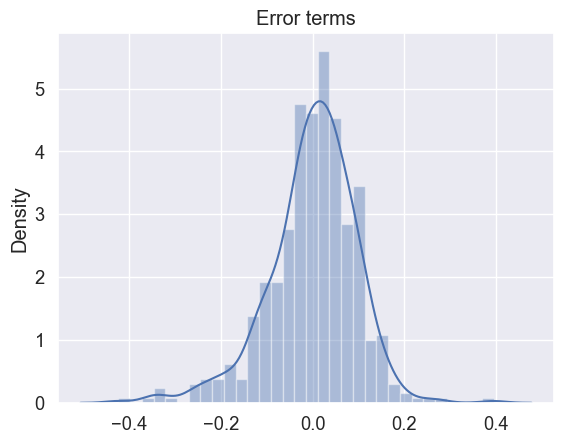

In [51]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

**Insights:**
- The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

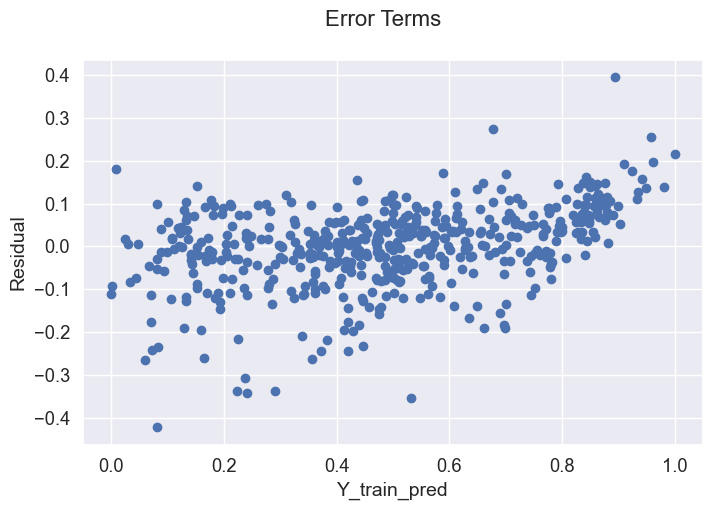

In [52]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

### 4.4 Prediction on test set

In [53]:
# check dataframe for the test set
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [54]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_sep,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0.652175,0.863516,0.393568,0,1,0,0,0,1
374,1,0,0.276477,0.584521,0.340487,0,0,0,0,0,0
181,0,0,0.817910,0.265533,0.165370,0,1,0,0,0,0
529,1,0,0.720868,0.486457,0.476922,1,0,0,0,0,0
233,0,0,0.777567,0.359532,0.524373,0,1,0,0,0,0


In [55]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_sep,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1.0,1,0,0.652175,0.863516,0.393568,0,1,0,0,0,1
374,1.0,1,0,0.276477,0.584521,0.340487,0,0,0,0,0,0
181,1.0,0,0,0.817910,0.265533,0.165370,0,1,0,0,0,0
529,1.0,1,0,0.720868,0.486457,0.476922,1,0,0,0,0,0
233,1.0,0,0,0.777567,0.359532,0.524373,0,1,0,0,0,0


In [56]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

### 4.5 Evaluate the model on test set

In [57]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.822


In [58]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.812


In [59]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0093


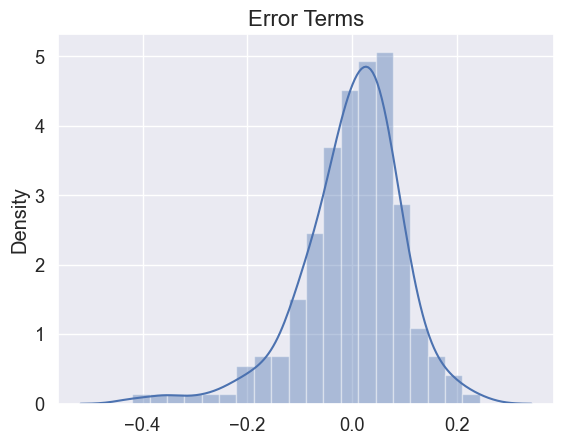

In [60]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

Text(0, 0.5, 'Residual')

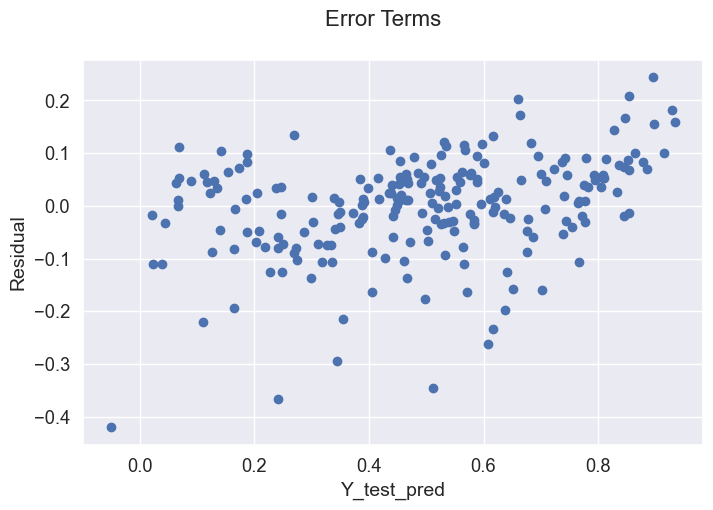

In [61]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

Text(0, 0.5, 'y_test_pred')

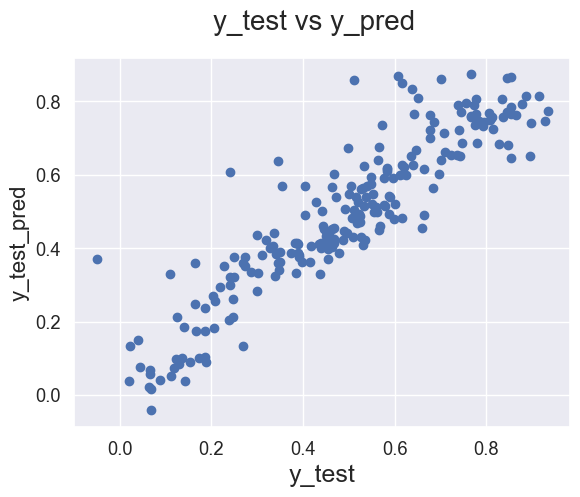

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

### Step-5: Conclusions

In [70]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\nCoefficent for the variables are:')
print(round(lm_final.params,3))

R- Sqaured train:  0.84   Adj. R-Squared train: 0.832
R- Sqaured test :  0.82   Adj. R-Squared test : 0.812

Coefficent for the variables are:
const                             0.191
yr                                0.249
holiday                          -0.096
temp                              0.484
hum                              -0.170
windspeed                        -0.175
season_summer                     0.136
season_fall                       0.079
season_winter                     0.180
mnth_sep                          0.090
weathersit_Mist_Cloudy           -0.050
weathersit_LightSnow_LightRain   -0.196
dtype: float64
